In [5]:
# import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [2]:
pisaTrain = pd.read_csv('pisa2009train.csv')
pisaTest = pd.read_csv('pisa2009test.csv')
print('Shape of training set: ',pisaTrain.shape)
print('Shape of test set: ', pisaTest.shape)

('Shape of training set: ', (3663, 24))
('Shape of test set: ', (1570, 24))


In [8]:
pisaTrain.dtypes

grade                      int64
male                       int64
raceeth                   object
preschool                float64
expectBachelors          float64
motherHS                 float64
motherBachelors          float64
motherWork               float64
fatherHS                 float64
fatherBachelors          float64
fatherWork               float64
selfBornUS               float64
motherBornUS             float64
fatherBornUS             float64
englishAtHome            float64
computerForSchoolwork    float64
read30MinsADay           float64
minutesPerWeekEnglish    float64
studentsInEnglish        float64
schoolHasLibrary         float64
publicSchool               int64
urban                      int64
schoolSize               float64
readingScore             float64
dtype: object

### Previes of data

In [3]:
pisaTrain.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,1,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,...,0.0,1.0,0.0,225.0,NaN,1.0,1,1,673.0,476.00
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
2,9,1,White,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89


### Missing Values

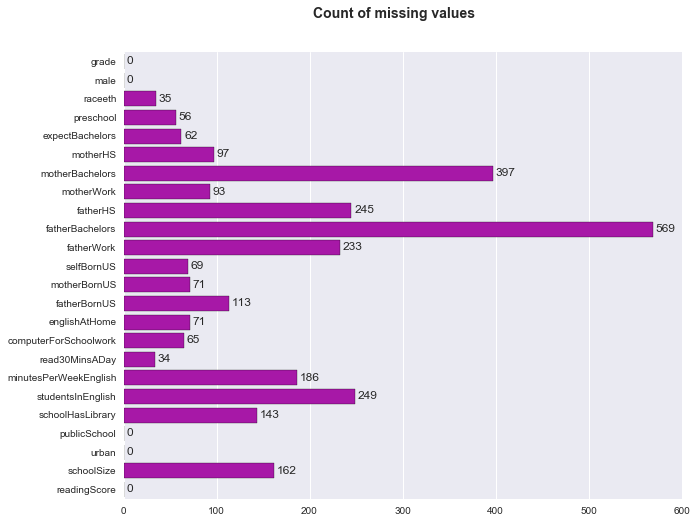

In [6]:
fig = plt.figure(figsize=(10, 8))
fig.suptitle('Count of missing values', fontsize=14, fontweight='bold')
null_data = pisaTrain.isnull().sum()
ax = sns.barplot(x = null_data.values, y=null_data.index, color="m" )
i = 0
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 3, p.get_y() + 0.5, null_data.values[i])
    i += 1

In [10]:
# Continuous Features
contFeatures = ['minutesPerWeekEnglish','studentsInEnglish','schoolSize']
binaryFeatures = ['male',  'preschool', 'expectBachelors',
       'motherHS', 'motherBachelors', 'motherWork', 'fatherHS',
       'fatherBachelors', 'fatherWork', 'selfBornUS', 'motherBornUS',
       'fatherBornUS', 'englishAtHome', 'computerForSchoolwork',
       'read30MinsADay','schoolHasLibrary', 'publicSchool', 'urban' ]

In [11]:
pisaTrain[contFeatures].describe()

,minutesPerWeekEnglish,studentsInEnglish,schoolSize
count,3477.000000,3414.000000,3501.000000
mean,266.208225,24.499414,1369.316767
std,148.403525,7.184348,869.983618
min,0.000000,1.000000,100.000000
25%,225.000000,20.000000,712.000000
50%,250.000000,25.000000,1212.000000
75%,300.000000,30.000000,1900.000000
max,2400.000000,75.000000,6694.000000


In [12]:
# correlation
corDf = pisaTrain.corr(method='pearson')
corDf

,grade,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
grade,1.000000,-0.097677,-0.023262,0.140200,0.005461,0.043171,0.019385,0.046210,0.061713,0.012731,...,-0.025675,0.112157,0.065008,0.028157,0.085289,-0.026542,-0.063972,0.076277,0.067454,0.286752
male,-0.097677,1.000000,0.014807,-0.078029,0.030586,0.074250,-0.011641,0.017784,0.076257,0.030614,...,-0.009790,-0.015485,-0.220103,0.010700,-0.025404,0.032114,-0.075466,0.036377,0.012921,-0.153928
preschool,-0.023262,0.014807,1.000000,0.076046,0.141552,0.151832,0.069249,0.117443,0.141418,0.065079,...,0.120480,0.076612,-0.008649,-0.015110,-0.027114,0.036506,-0.070919,-0.053684,-0.032582,0.040537
expectBachelors,0.140200,-0.078029,0.076046,1.000000,0.104886,0.168330,0.069366,0.156028,0.199217,0.003122,...,0.044169,0.130413,0.135002,0.018364,0.050988,0.072164,-0.112698,-0.004022,0.016164,0.360144
motherHS,0.005461,0.030586,0.141552,0.104886,1.000000,0.252322,0.176354,0.500723,0.227148,0.038105,...,0.374486,0.187951,0.011641,0.019021,-0.036948,0.012129,-0.067646,-0.117988,-0.084460,0.156488
motherBachelors,0.043171,0.074250,0.151832,0.168330,0.252322,1.000000,0.142306,0.197929,0.543581,0.071973,...,0.169733,0.146681,0.021138,0.023004,-0.041765,0.022990,-0.161796,-0.048131,-0.011638,0.214240
motherWork,0.019385,-0.011641,0.069249,0.069366,0.176354,0.142306,1.000000,0.102632,0.057245,0.039578,...,0.128595,0.083805,-0.049956,0.009103,-0.032115,-0.011439,-0.036711,-0.012350,-0.039499,0.043401
fatherHS,0.046210,0.017784,0.117443,0.156028,0.500723,0.197929,0.102632,1.000000,0.280287,0.100620,...,0.324131,0.173284,0.032457,0.041421,-0.007217,0.030027,-0.080654,-0.098083,-0.080115,0.175464
fatherBachelors,0.061713,0.076257,0.141418,0.199217,0.227148,0.543581,0.057245,0.280287,1.000000,0.106328,...,0.138824,0.174256,0.047728,0.007736,-0.019529,0.017605,-0.176680,-0.018506,0.019602,0.266236
fatherWork,0.012731,0.030614,0.065079,0.003122,0.038105,0.071973,0.039578,0.100620,0.106328,1.000000,...,0.022521,0.078806,-0.012103,0.030462,-0.000204,-0.012325,-0.023248,-0.039698,-0.023414,0.070423


In [13]:
indices = np.where(corDf > 0.5)
indices = [(corDf.index[x], corDf.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
indices

[('motherHS', 'fatherHS'),
 ('motherBachelors', 'fatherBachelors'),
 ('motherBornUS', 'fatherBornUS'),
 ('motherBornUS', 'englishAtHome'),
 ('fatherBornUS', 'englishAtHome')]

In [14]:
pisaTrain['grade'].value_counts()

10    2532
11     726
9      397
12       4
8        4
Name: grade, dtype: int64

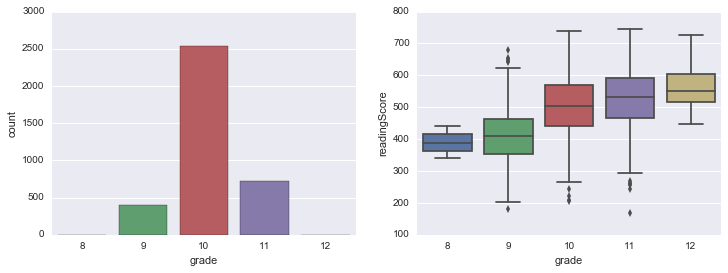

In [15]:
fig, ax = plt.subplots(1,2, figsize=(12, 4))
sns.countplot(x='grade', data=pisaTrain, ax=ax[0])
sns.boxplot(x='grade', y='readingScore', data=pisaTrain, ax=ax[1])
plt.show()

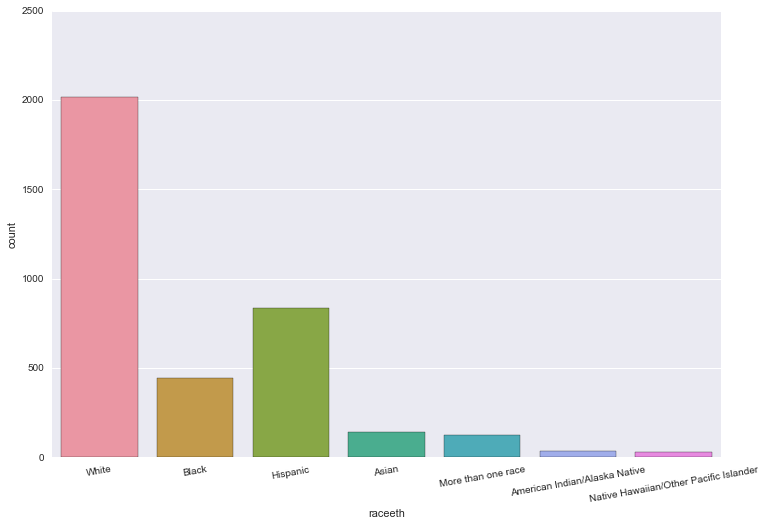

In [17]:
fig = plt.figure(figsize=(12, 8))
sns.countplot(x='raceeth', data=pisaTrain)
a = plt.xticks(rotation = 10)

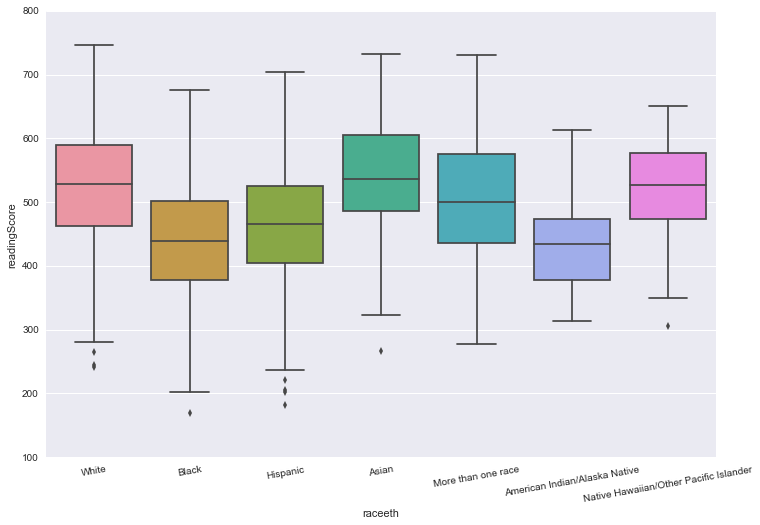

In [18]:
fig = plt.figure(figsize=(12, 8))
sns.boxplot(x='raceeth', y='readingScore', data=pisaTrain)
x = plt.xticks(rotation = 10)
plt.show()

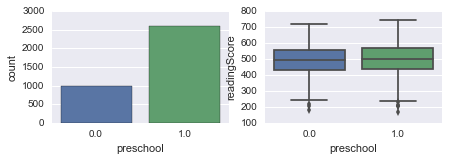

In [19]:
fig, ax = plt.subplots(1,2, figsize=(7, 2))
sns.countplot(x='preschool', data=pisaTrain, ax=ax[0])
sns.boxplot(x='preschool', y='readingScore', data=pisaTrain, ax=ax[1])
plt.show()

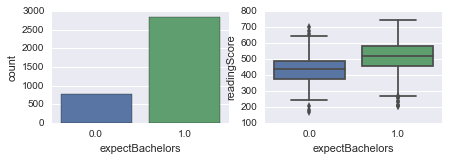

In [20]:
fig, ax = plt.subplots(1,2, figsize=(7, 2))
sns.countplot(x='expectBachelors', data=pisaTrain, ax=ax[0])
sns.boxplot(x='expectBachelors', y='readingScore', data=pisaTrain, ax=ax[1])
plt.show()

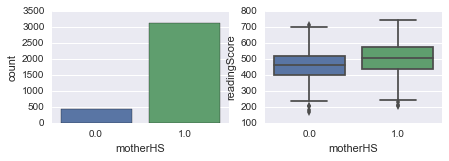

In [21]:
fig, ax = plt.subplots(1,2, figsize=(7, 2))
sns.countplot(x='motherHS', data=pisaTrain, ax=ax[0])
sns.boxplot(x='motherHS', y='readingScore', data=pisaTrain, ax=ax[1])
plt.show()

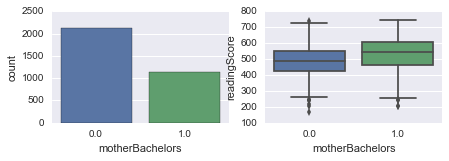

In [22]:
fig, ax = plt.subplots(1,2, figsize=(7, 2))
sns.countplot(x='motherBachelors', data=pisaTrain, ax=ax[0])
sns.boxplot(x='motherBachelors', y='readingScore', data=pisaTrain, ax=ax[1])
plt.show()

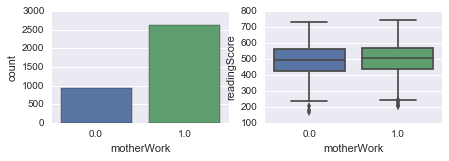

In [23]:
fig, ax = plt.subplots(1,2, figsize=(7, 2))
sns.countplot(x='motherWork', data=pisaTrain, ax=ax[0])
sns.boxplot(x='motherWork', y='readingScore', data=pisaTrain, ax=ax[1])
plt.show()

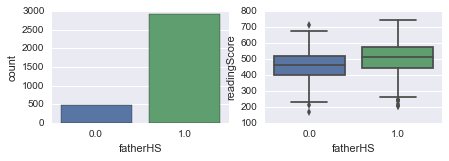

In [24]:
fig, ax = plt.subplots(1,2, figsize=(7, 2))
sns.countplot(x='fatherHS', data=pisaTrain, ax=ax[0])
sns.boxplot(x='fatherHS', y='readingScore', data=pisaTrain, ax=ax[1])
plt.show()

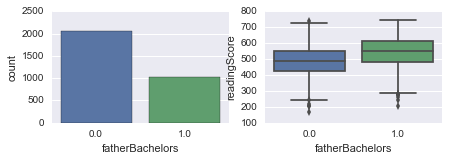

In [25]:
fig, ax = plt.subplots(1,2, figsize=(7, 2))
sns.countplot(x='fatherBachelors', data=pisaTrain, ax=ax[0])
sns.boxplot(x='fatherBachelors', y='readingScore', data=pisaTrain, ax=ax[1])
plt.show()

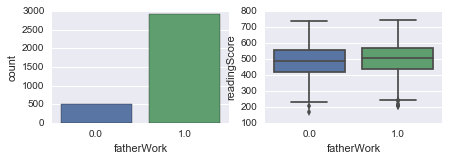

In [26]:
fig, ax = plt.subplots(1,2, figsize=(7, 2))
sns.countplot(x='fatherWork', data=pisaTrain, ax=ax[0])
sns.boxplot(x='fatherWork', y='readingScore', data=pisaTrain, ax=ax[1])
plt.show()

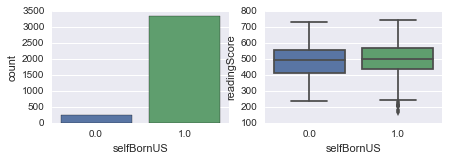

In [27]:
fig, ax = plt.subplots(1,2, figsize=(7, 2))
sns.countplot(x='selfBornUS', data=pisaTrain, ax=ax[0])
sns.boxplot(x='selfBornUS', y='readingScore', data=pisaTrain, ax=ax[1])
plt.show()

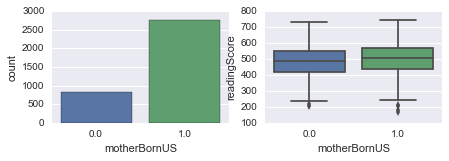

In [28]:
fig, ax = plt.subplots(1,2, figsize=(7, 2))
sns.countplot(x='motherBornUS', data=pisaTrain, ax=ax[0])
sns.boxplot(x='motherBornUS', y='readingScore', data=pisaTrain, ax=ax[1])
plt.show()

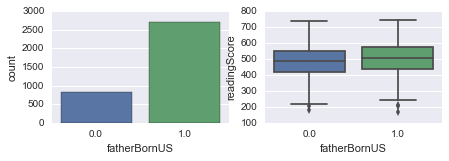

In [29]:
fig, ax = plt.subplots(1,2, figsize=(7, 2))
sns.countplot(x='fatherBornUS', data=pisaTrain, ax=ax[0])
sns.boxplot(x='fatherBornUS', y='readingScore', data=pisaTrain, ax=ax[1])
plt.show()

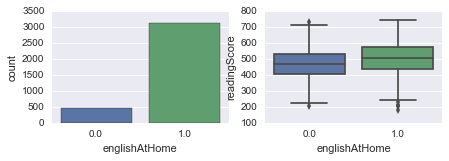

In [30]:
fig, ax = plt.subplots(1,2, figsize=(7, 2))
sns.countplot(x='englishAtHome', data=pisaTrain, ax=ax[0])
sns.boxplot(x='englishAtHome', y='readingScore', data=pisaTrain, ax=ax[1])
plt.show()

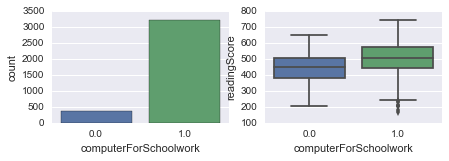

In [31]:
fig, ax = plt.subplots(1,2, figsize=(7, 2))
sns.countplot(x='computerForSchoolwork', data=pisaTrain, ax=ax[0])
sns.boxplot(x='computerForSchoolwork', y='readingScore', data=pisaTrain, ax=ax[1])
plt.show()

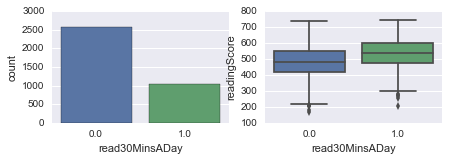

In [32]:
fig, ax = plt.subplots(1,2, figsize=(7, 2))
sns.countplot(x='read30MinsADay', data=pisaTrain, ax=ax[0])
sns.boxplot(x='read30MinsADay', y='readingScore', data=pisaTrain, ax=ax[1])
plt.show()

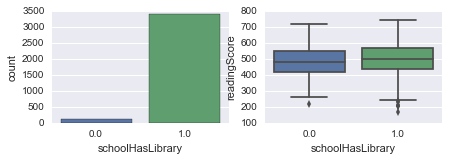

In [33]:
fig, ax = plt.subplots(1,2, figsize=(7, 2))
sns.countplot(x='schoolHasLibrary', data=pisaTrain, ax=ax[0])
sns.boxplot(x='schoolHasLibrary', y='readingScore', data=pisaTrain, ax=ax[1])
plt.show()

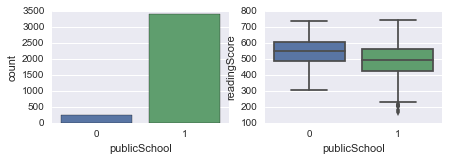

In [34]:
fig, ax = plt.subplots(1,2, figsize=(7, 2))
sns.countplot(x='publicSchool', data=pisaTrain, ax=ax[0])
sns.boxplot(x='publicSchool', y='readingScore', data=pisaTrain, ax=ax[1])
plt.show()

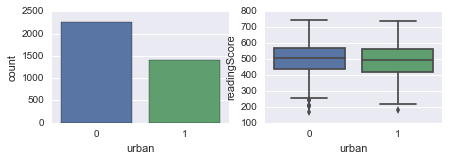

In [35]:
fig, ax = plt.subplots(1,2, figsize=(7, 2))
sns.countplot(x='urban', data=pisaTrain, ax=ax[0])
sns.boxplot(x='urban', y='readingScore', data=pisaTrain, ax=ax[1])
plt.show()

In [36]:
pisaTrain[contFeatures].describe()

,minutesPerWeekEnglish,studentsInEnglish,schoolSize
count,3477.000000,3414.000000,3501.000000
mean,266.208225,24.499414,1369.316767
std,148.403525,7.184348,869.983618
min,0.000000,1.000000,100.000000
25%,225.000000,20.000000,712.000000
50%,250.000000,25.000000,1212.000000
75%,300.000000,30.000000,1900.000000
max,2400.000000,75.000000,6694.000000


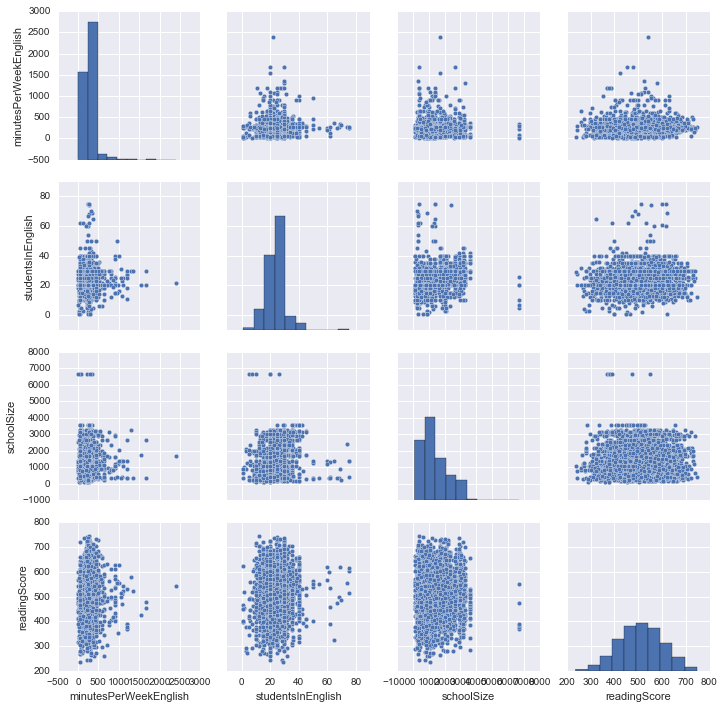

In [38]:
_ = sns.pairplot(pisaTrain[contFeatures + ['readingScore']].dropna())

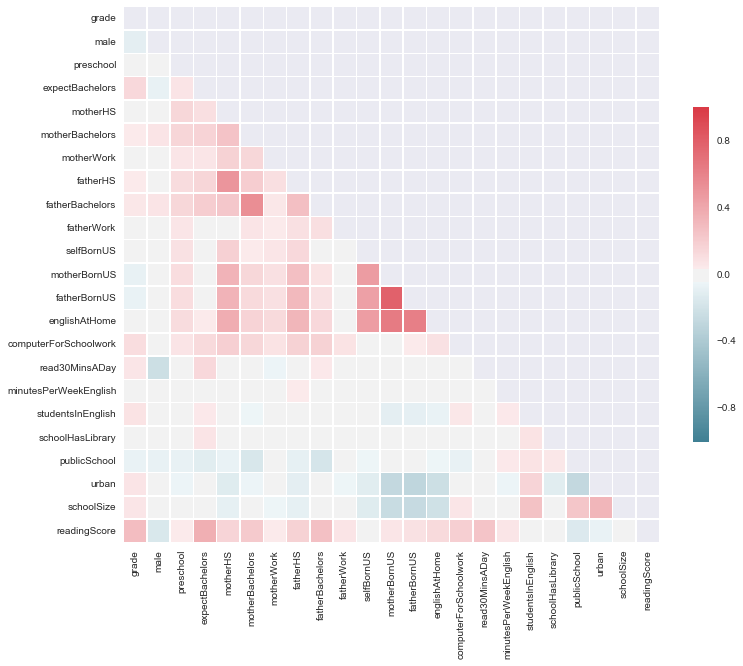

In [42]:
corr = pisaTrain.corr()

mask = np.zeros_like(cont_data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# # Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))
#
# # Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#
# # Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cont_data_corr, mask=mask, cmap=cmap,vmax=1,
            square=True,linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

In [43]:
cor_dict = corr['readingScore'].to_dict()
del cor_dict['readingScore']
print("List the numerical features decendingly by their correlation with Reading Score:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("%21s: %.3f" %(ele))

List the numerical features decendingly by their correlation with Reading Score:

      expectBachelors: 0.360
                grade: 0.287
      fatherBachelors: 0.266
       read30MinsADay: 0.247
      motherBachelors: 0.214
computerForSchoolwork: 0.190
             fatherHS: 0.175
             motherHS: 0.156
                 male: -0.154
         publicSchool: -0.134
        englishAtHome: 0.126
         fatherBornUS: 0.089
           fatherWork: 0.070
minutesPerWeekEnglish: 0.068
                urban: -0.064
         motherBornUS: 0.063
           motherWork: 0.043
            preschool: 0.041
     schoolHasLibrary: 0.038
    studentsInEnglish: 0.035
           schoolSize: 0.027
           selfBornUS: 0.024
